In [1]:
import pymongo
import pandas as pd
import os

1. Thực hành thiết lập local MondoDB database server.

In [2]:
connection_string = "mongodb://localhost:27017/dataMining"

2. Xây dựng CSDL MongoDB. 

Em tạo cơ sở dữ liệu MongoDB có tên "image_caption_db" với bộ sưu tập có tên "image_captions"

In [3]:
client = pymongo.MongoClient(connection_string)
db = client['image_caption_db']
collection = db['image_captions']

In [4]:
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'image_caption_db'), 'image_captions')

In [6]:
data = pd.read_csv('../data/captions.txt')

In [7]:
# Insert each row from the DataFrame into the MongoDB collection
for index, row in data.iterrows():
    image = row['image']
    caption = row['caption']
    
    # Insert document into the collection
    collection.insert_one({
        'image': image,
        'caption': caption
    })

print("Data inserted successfully.")

Data inserted successfully.


3. Đọc dữ liệu từ jupyter notebook và phân tích dữ liệu với pandas.


In [8]:
# Fetch all data from MongoDB into a DataFrame
cursor = collection.find({})
data = pd.DataFrame(list(cursor))

image_caption_counts = data['image'].value_counts()

print("number of captions for each image")
print(image_caption_counts)

number of captions for each image
image
1000092795.jpg    30
2845084079.jpg    30
2845086305.jpg    30
2845246160.jpg    30
2845525442.jpg    30
                  ..
4435179084.jpg    20
4435313832.jpg    20
4435343922.jpg    20
4435598180.jpg    20
998845445.jpg     20
Name: count, Length: 31783, dtype: int64


In [9]:
print("There are {} image to captions".format(len(data)))

There are 772550 image to captions


In [10]:
data.head(10)

,_id,image,caption
0,65faeac65474ab67089fee52,1000092795.jpg,Two young guys with shaggy hair look at their...
1,65faeac65474ab67089fee53,1000092795.jpg,"Two young , White males are outside near many..."
2,65faeac65474ab67089fee54,1000092795.jpg,Two men in green shirts are standing in a yard .
3,65faeac65474ab67089fee55,1000092795.jpg,A man in a blue shirt standing in a garden .
4,65faeac65474ab67089fee56,1000092795.jpg,Two friends enjoy time spent together .
5,65faeac65474ab67089fee57,10002456.jpg,Several men in hard hats are operating a gian...
6,65faeac65474ab67089fee58,10002456.jpg,Workers look down from up above on a piece of...
7,65faeac65474ab67089fee59,10002456.jpg,Two men working on a machine wearing hard hats .
8,65faeac65474ab67089fee5a,10002456.jpg,Four men on top of a tall structure .
9,65faeac65474ab67089fee5b,10002456.jpg,Three men on a large rig .


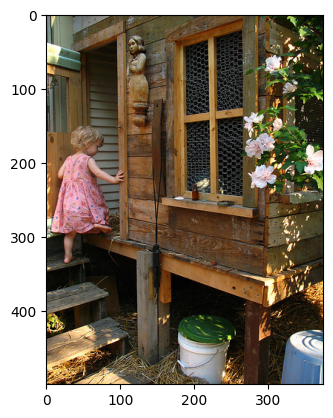

Caption:  A little girl in a pink dress going into a wooden cabin .
Caption:  A little girl climbing the stairs to her playhouse .
Caption:  A little girl climbing into a wooden playhouse 
Caption:  A girl going into a wooden building .
Caption:  Someone in a blue shirt and hat is standing on stair and leaning against a window .


In [12]:
# check random id for image and captioning

import matplotlib.pyplot as plt

import matplotlib.image as mpimg
data_idx = 11

#1000268201_693b08cb0e.jpg
image_path ="../data/Images/"+str(data.iloc[data_idx,1])
img=mpimg.imread(image_path)
plt.imshow(img)
plt.show()

#image consits of 5 captions,
#showing all 5 captions of the image of the given idx 
for i in range(data_idx,data_idx+5):
    print("Caption:",data.iloc[i,2])

4. Đọc dữ liệu từ API theo cấu trúc JSON.

In [35]:
# Extract from  dataset
# the api is using the library kaggle
!pip install kaggle

     -------------------------------------- 84.6/84.6 kB 594.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.2/78.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111955 sha256=3795da0eed9e5ccfe1346da1ba0c203f3b436d75c08577fabed22cb82a23e36f
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\54\6e\ff\d5ab6af2287a2d0c5b8cea9328fb14940ca253fe60214a99c8
Successfully built kaggle


Note that you need to move the kaggle.json to the path: C:\Users\Urs\ .kaggle

In [1]:
import kaggle

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()

api.authenticate()

Chọn đường dẫn đến file dataset muốn download: https://www.kaggle.com/code/trungit/flickr8k-vietnamese-captions


In [10]:
import json

data_new = api.datasets_download_file(owner_slug="trungit", dataset_slug="flickr8k-vi-caps", file_name="testImages.txt" )
# Split the data by "\r\n" to get a list of filenames
filenames = data_new.split("\r\n")

# Create a dictionary with key "images" containing the list of filenames
json_data = {
    "images": filenames
}

# Convert the dictionary to JSON
json_str = json.dumps(json_data, indent=2)

# Print the JSON string
print(json_str)

{
  "images": [
    "2135502491_a15c6b5eae.jpg",
    "2445783904_e6c38a3a3d.jpg",
    "2642475077_69d19deb74.jpg",
    "2862481071_86c65d46fa.jpg",
    "3060969260_08f43e4f4f.jpg",
    "3339916063_63b960ed46.jpg",
    "3396157719_6807d52a81.jpg",
    "3648988742_888a16f600.jpg",
    "397451339_76a84bd310.jpg",
    "544576742_283b65fa0d.jpg",
    "55473406_1d2271c1f2.jpg",
    "751074141_feafc7b16c.jpg",
    "463978865_c87c6ca84c.jpg",
    "3132832452_c354c6396c.jpg",
    "1260816604_570fc35836.jpg",
    "2467803152_70eeca1334.jpg",
    "2754898893_95239c1f19.jpg",
    "1347519824_e402241e4f.jpg",
    "3379839396_0cd84b55f1.jpg",
    "218342358_1755a9cce1.jpg",
    "3330935489_9cb67ca36b.jpg",
    "3712742641_641282803e.jpg",
    "3068735836_872fba3068.jpg",
    "1248940539_46d33ed487.jpg",
    "3633396324_c4b24b1f51.jpg",
    "2689358407_9932f1b20c.jpg",
    "2284894733_b710b9b106.jpg",
    "1007129816_e794419615.jpg",
    "1007320043_627395c3d8.jpg",
    "1012212859_01547e3f17.jpg",
 

5. Lọc dữ liệu và tính toán khoảng cách với hàm Haversine Distance Calculation.

Đầu tiên,ta sẽ lọc dữ liệu dựa trên một điều kiện, sau đó tính khoảng cách giữa hai điểm bằng công thức Haversine

Hàm tính khoảng cách Haversine: tính khoảng cách giữa hai điểm vĩ độ/kinh độ:

In [13]:
import numpy as np
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of earth in kilometers
    r = 6371.0

    # Calculate the distance
    distance = r * c
    return distance

Bây giờ, hãy lọc dữ liệu dựa trên một điều kiện (ví dụ: chọn hình ảnh có chú thích cụ thể là "young") rồi tính khoảng cách giữa hai điểm.

In [14]:
data['lat1'] = np.random.uniform(30, 40, len(data))
data['lon1'] = np.random.uniform(-120, -100, len(data))
data['lat2'] = np.random.uniform(30, 40, len(data))
data['lon2'] = np.random.uniform(-120, -100, len(data))

# Drop rows with NaN values in specific columns
data = data.dropna(subset=['lat1', 'lon1', 'lat2', 'lon2'])

# Filter data based on a condition which is "yuong"
filtered_data = data[data['caption'].str.contains('young', na=False)]
filtered_data['distance'] = haversine(filtered_data['lat1'], filtered_data['lon1'],
                                     filtered_data['lat2'], filtered_data['lon2'])

# Print the filtered data with distance
print(filtered_data[['image', 'caption', 'distance']])

                 image                                            caption  \
0       1000092795.jpg   Two young guys with shaggy hair look at their...   
1       1000092795.jpg   Two young , White males are outside near many...   
37        10010052.jpg   A young adult wearing rollerblades , holding ...   
38        10010052.jpg   there is a young girl on her cellphone while ...   
42      1001465944.jpg   A young woman walks past two young people dre...   
...                ...                                                ...   
772456   989754491.jpg   A young girl with goggles and floaties poses ...   
772540    99804383.jpg   An older busker in glasses plays an Eastern s...   
772542    99804383.jpg   A older Asian man is playing an instrument in...   
772543    99804383.jpg   An elderly man sits outside a storefront acco...   
772546   998845445.jpg   A young man hanging over the side of a boat ,...   

           distance  
0       1038.162481  
1        756.816728  
37       

C:\Users\Admin\AppData\Local\Temp\ipykernel_2132\2742037887.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['distance'] = haversine(filtered_data['lat1'], filtered_data['lon1'],


6. Vẽ đồ thị từ dữ liệu truy vấn với Matplotlib và NumPy.

vẽ đồ thị dữ liệu bằng Matplotlib và NumPy; ta sẽ tạo một biểu đồ phân tán đơn giản để trực quan hóa mối quan hệ giữa khoảng cách và một số thuộc tính khác

C:\Users\Admin\AppData\Local\Temp\ipykernel_2132\1545297525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['image_count'] = np.random.randint(1, len(data), len(filtered_data))


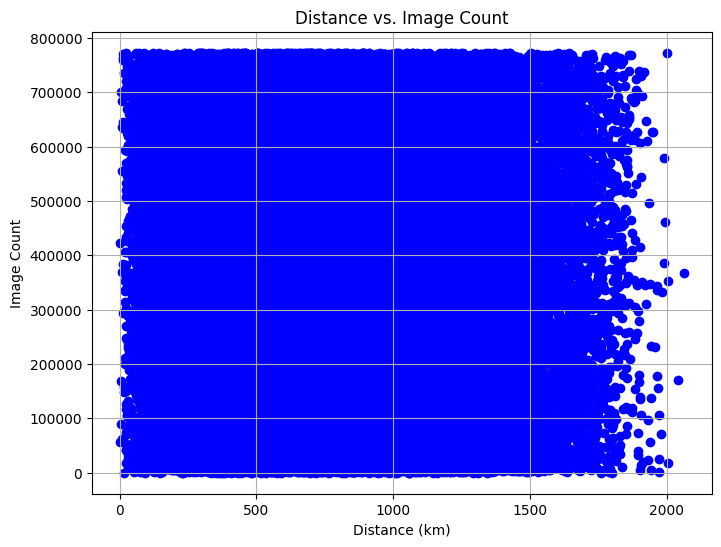

In [15]:
import matplotlib.pyplot as plt

# Assuming we have some other attribute (e.g., number of images)
filtered_data['image_count'] = np.random.randint(1, len(data), len(filtered_data))

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['distance'], filtered_data['image_count'], color='blue')
plt.xlabel('Distance (km)')
plt.ylabel('Image Count')
plt.title('Distance vs. Image Count')
plt.grid(True)
plt.show()

7. Xây dựng hàm hồi quy tuyến tính với SciPy.

Em sử dụng hàm linregress từ SciPy.

Slope: -0.5633320859895247
Intercept: 386503.7074437322
R-squared: 9.905391301960641e-07
p-value: 0.8100594960767787
Standard Error: 2.343795398272236


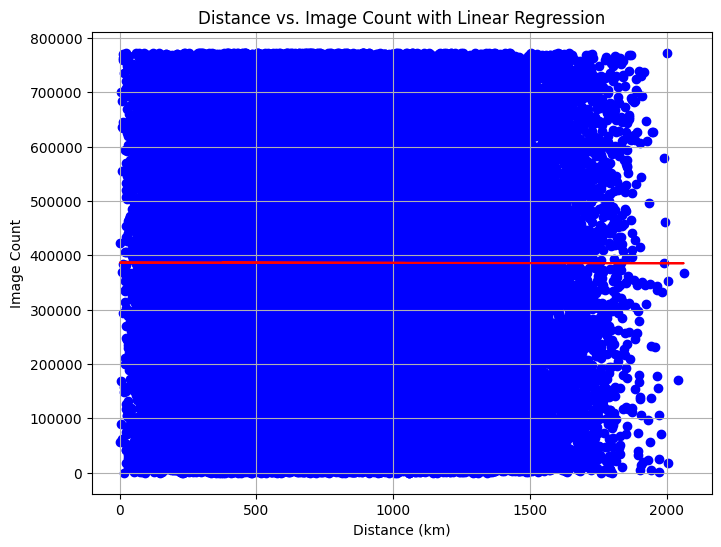

In [16]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_data['distance'], filtered_data['image_count'])

# Print the regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard Error:", std_err)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['distance'], filtered_data['image_count'], color='blue')
plt.plot(filtered_data['distance'], intercept + slope * filtered_data['distance'], color='red')
plt.xlabel('Distance (km)')
plt.ylabel('Image Count')
plt.title('Distance vs. Image Count with Linear Regression')
plt.grid(True)
plt.show()